# Load libraries

In [36]:
!pip install xgboost


In [37]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import brier_score_loss, log_loss
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import precision_recall_curve
from xgboost import XGBClassifier

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load and preprocessing dataset "internet_service_churn.csv".

In [39]:
# Dataset loading
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/internet_service_churn.csv'
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
# Dataset printing (first 5 rows)
df.tail()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
72269,1689648,1,1,0.09,0,1.25,0,0.0,0.0,0,1
72270,1689676,1,0,0.06,1,1.63,0,0.8,0.0,0,1
72271,1689679,1,0,0.02,0,2.19,0,1.5,0.2,0,1
72272,1689733,0,0,0.01,0,0.72,0,0.0,0.0,0,1
72273,1689744,1,1,0.01,0,0.82,0,0.0,0.0,0,1


In [41]:
# Output dataset size
df.shape

(72274, 11)

In [42]:
# Output dataset dtypes, nan by colunms with the method info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           72274 non-null  int64  
 1   is_tv_subscriber             72274 non-null  int64  
 2   is_movie_package_subscriber  72274 non-null  int64  
 3   subscription_age             72274 non-null  float64
 4   bill_avg                     72274 non-null  int64  
 5   reamining_contract           50702 non-null  float64
 6   service_failure_count        72274 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          72274 non-null  int64  
 10  churn                        72274 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 6.1 MB


In [43]:
# Dataset columns with null data
df.isnull().sum()

,0
id,0
is_tv_subscriber,0
is_movie_package_subscriber,0
subscription_age,0
bill_avg,0
reamining_contract,21572
service_failure_count,0
download_avg,381
upload_avg,381
download_over_limit,0


# Data analysis and modification

In [44]:
# statistical descriptive data analysis
df.describe()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
count,7.227400e+04,72274.000000,72274.000000,72274.000000,72274.000000,50702.000000,72274.000000,71893.000000,71893.000000,72274.000000,72274.000000
mean,8.463182e+05,0.815259,0.334629,2.450051,18.942483,0.716039,0.274234,43.689911,4.192076,0.207613,0.554141
std,4.891022e+05,0.388090,0.471864,2.034990,13.215386,0.697102,0.816621,63.405963,9.818896,0.997123,0.497064
min,1.500000e+01,0.000000,0.000000,-0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.222165e+05,1.000000,0.000000,0.930000,13.000000,0.000000,0.000000,6.700000,0.500000,0.000000,0.000000
50%,8.477840e+05,1.000000,0.000000,1.980000,19.000000,0.570000,0.000000,27.800000,2.100000,0.000000,1.000000
75%,1.269562e+06,1.000000,1.000000,3.300000,22.000000,1.310000,0.000000,60.500000,4.800000,0.000000,1.000000
max,1.689744e+06,1.000000,1.000000,12.800000,406.000000,2.920000,19.000000,4415.200000,453.300000,7.000000,1.000000


Summary to the descriptive analysis:

There is significant variability in features like 'bill_avg', 'download_avg', and 'upload_avg'.
'reamining_contract' (possibly 'remaining_contract') has too many missing values.
The 'subscription_age' column includes a negative value, which might require correction.
The high churn rate (55.41%) suggests that a significant portion of users are leaving the service.

In [45]:
# Removing the column 'reamining_contract' with 21572 zerou values and "id"
df.drop(columns=['id', 'reamining_contract'], axis=1, inplace=True)

df.columns

Index(['is_tv_subscriber', 'is_movie_package_subscriber', 'subscription_age',
       'bill_avg', 'service_failure_count', 'download_avg', 'upload_avg',
       'download_over_limit', 'churn'],
      dtype='object')

In [46]:
# Filling in missing values ​​with average values
df['download_avg'] = df['download_avg'].fillna(df['download_avg'].mean())
df['upload_avg']= df['upload_avg'].fillna(df['upload_avg'].mean())

In [47]:
# Check missing values in dataset

missing_values = df.isnull().sum()
print("Number of missing values ​​in each column:")
print(missing_values)

Number of missing values ​​in each column:
is_tv_subscriber               0
is_movie_package_subscriber    0
subscription_age               0
bill_avg                       0
service_failure_count          0
download_avg                   0
upload_avg                     0
download_over_limit            0
churn                          0
dtype: int64


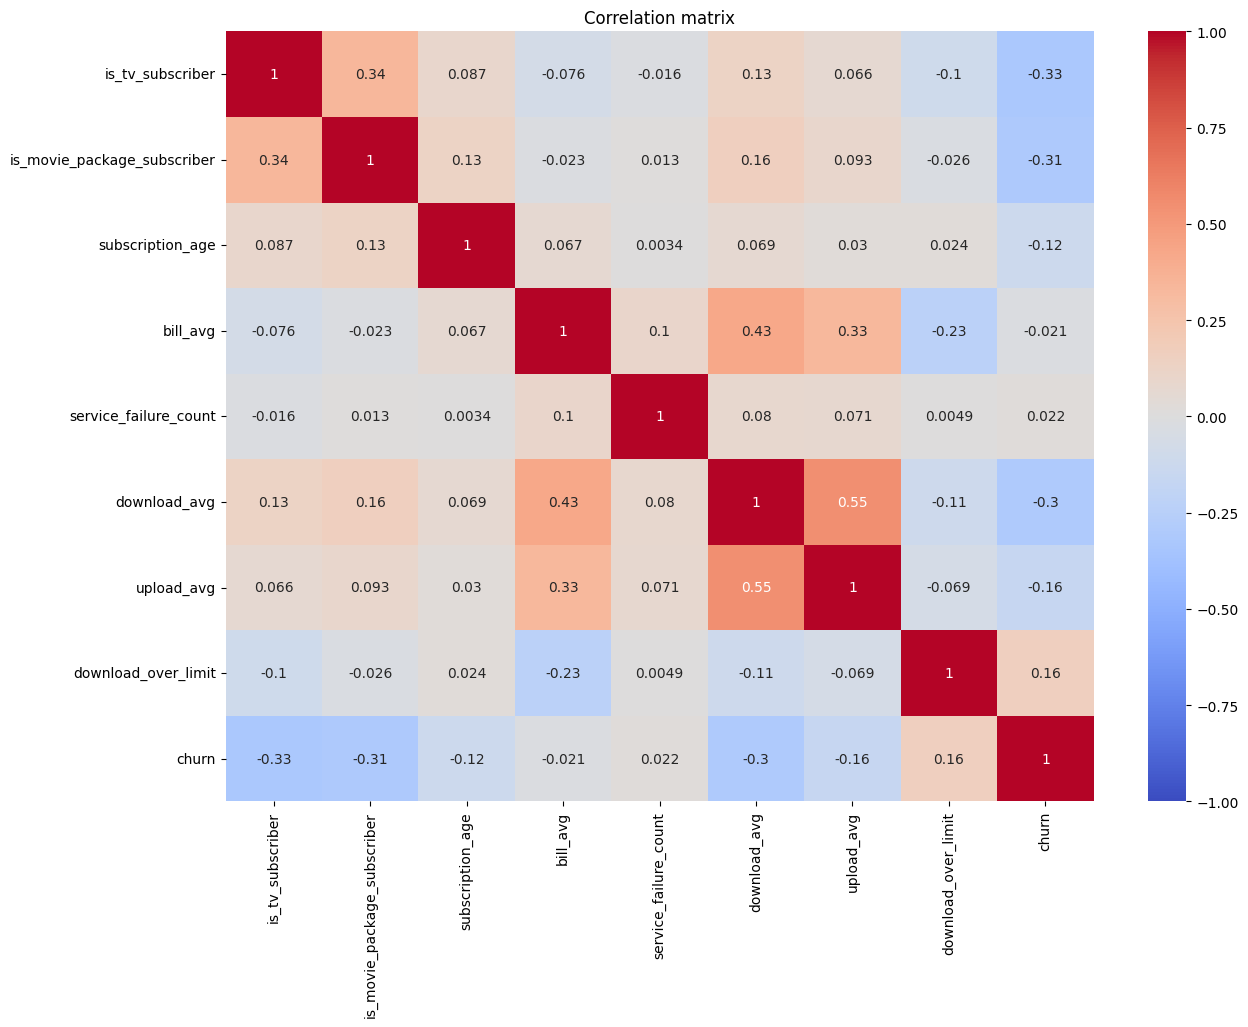

In [48]:
# Correlation analysis

correlation_matrix = df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation matrix')
plt.show()


In [49]:
correlation_matrix

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,service_failure_count,download_avg,upload_avg,download_over_limit,churn
is_tv_subscriber,1.000000,0.337435,0.087276,-0.076245,-0.016041,0.131312,0.065622,-0.103546,-0.327582
is_movie_package_subscriber,0.337435,1.000000,0.131986,-0.022534,0.013345,0.160099,0.092966,-0.026352,-0.307167
subscription_age,0.087276,0.131986,1.000000,0.067329,0.003449,0.068872,0.030076,0.023694,-0.122441
bill_avg,-0.076245,-0.022534,0.067329,1.000000,0.101270,0.429660,0.332676,-0.232738,-0.021058
service_failure_count,-0.016041,0.013345,0.003449,0.101270,1.000000,0.080459,0.070677,0.004947,0.021575
download_avg,0.131312,0.160099,0.068872,0.429660,0.080459,1.000000,0.554436,-0.114308,-0.297080
upload_avg,0.065622,0.092966,0.030076,0.332676,0.070677,0.554436,1.000000,-0.069184,-0.162153
download_over_limit,-0.103546,-0.026352,0.023694,-0.232738,0.004947,-0.114308,-0.069184,1.000000,0.158318
churn,-0.327582,-0.307167,-0.122441,-0.021058,0.021575,-0.297080,-0.162153,0.158318,1.000000


Summary to correlation matrix relativly to 'churn' as output varible:

Negatively correlated with varibles: is_tv_subscriber (-0.33),is_movie_package_subscriber (-0.31), subscription_age (-0.12), download_avg (-0.30), and upload_avg (-0.16). This suggests that users who churn are less likely to be TV or movie subscribers, have younger subscription ages, and lower download/upload speeds.

Positive correlation with download_over_limit (0.16), indicating that users exceeding download limits are more likely to leave the service.

Key points:

Churn Prediction: Users with lower download speeds, not subscribing to TV or movie packages, and who exceed download limits are more likely to churn.
Billing Insights: Higher average bills are associated with better download and upload speeds.
Service Failures: These have minimal impact on churn, suggesting that other factors are more critical.

In [50]:
# Checking if there is an imbalance in the data by the output varible 'churn'
value_counts = df['churn'].value_counts(normalize=True) * 100

result_df = value_counts.reset_index()
result_df.columns = ['churn', 'percentage']
result_df

,churn,percentage
0,1,55.414118
1,0,44.585882


<Axes: title={'center': "Count of customers who has churned & didn't churn"}, xlabel='churn', ylabel='count'>

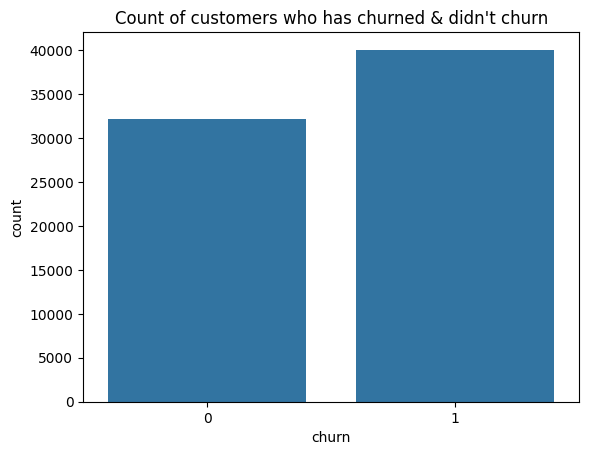

In [51]:
plt.title("Count of customers who has churned & didn't churn")
sns.countplot(x = 'churn',  data = df)

The count of people who have already churned is more. There is no imbalance in the data with 40050 (55%) who has churned & 31843 (44%) who has not churned.

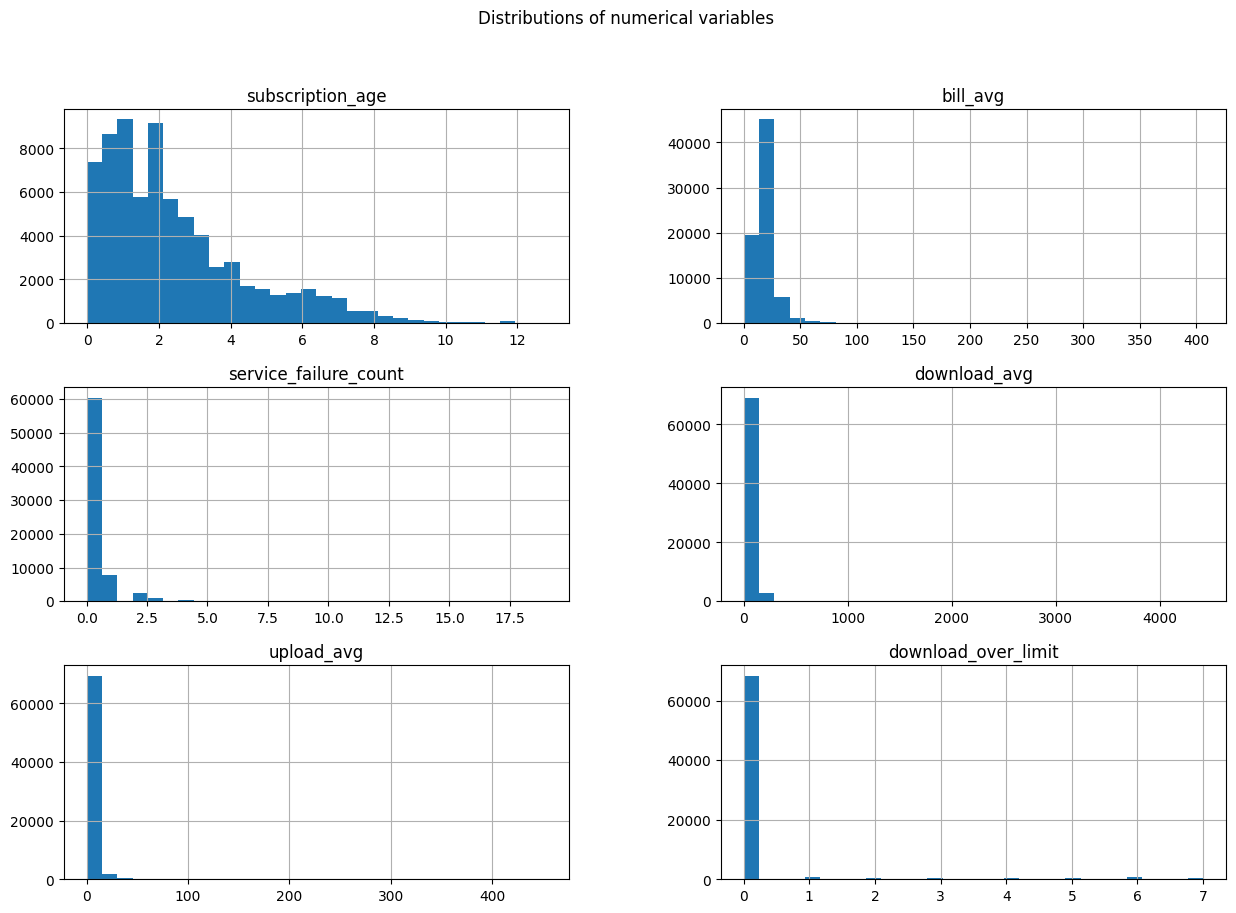

In [52]:
# Visualization numerical data

numeric_cols = ['subscription_age', 'bill_avg', 'service_failure_count', 'download_avg', 'upload_avg', 'download_over_limit']
df[numeric_cols].hist(bins=30, figsize=(15, 10))
plt.suptitle('Distributions of numerical variables')
plt.show()

#Data Pipeline

In [53]:
# One-hot coding of categorical variables and normalization of numerical features

categorical_cols = ['is_tv_subscriber', 'is_movie_package_subscriber', 'churn']
numeric_cols = ['subscription_age', 'bill_avg', 'service_failure_count', 'download_avg', 'upload_avg', 'download_over_limit']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])

In [54]:
df.head()

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,1,0,11.95,25,0,8.4,2.3,0,0
1,0,0,8.22,0,0,0.0,0.0,0,1
2,1,0,8.91,16,0,13.7,0.9,0,1
3,0,0,6.87,21,1,0.0,0.0,0,1
4,0,0,6.39,0,0,0.0,0.0,0,1


In [55]:
df.shape

(72274, 9)

In [56]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier())  # Replace with your model of choice
])
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['subscription_age',
                                                   'bill_avg',
                                                   'service_failure_count',
                                                   'download_avg', 'upload_avg',
                                                   'download_over_limit']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['is_tv_subscriber',
                                                   'is_movie_package_subscriber',
                                                   'churn'])])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None,...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

#Data training with XGBClassifier

The use of XGBClassifier is justified because it is more powerful and accurate for complex tasks where high accuracy, regularization, and the ability to process large data quickly are important

In [57]:
# Defining X and y
X = df.drop('churn', axis=1)
y = df['churn']

In [58]:
# Splitting data to training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
# Output training and testing sets size
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((57819, 8), (14455, 8), (57819,), (14455,))

In [60]:
model_xgb = XGBClassifier()

# Fit the model training data
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

# Predictions on the testing data and model performance evaluating

In [61]:
# Making predictions on the testing data
y_pred = model_xgb.predict(X_test)
y_pred

array([1, 1, 0, ..., 0, 1, 0])

In [62]:
# calculation Precision
precision = precision_score(y_test, y_pred)

# calculation Recall
recall = recall_score(y_test, y_pred)

# Calculation F1 Score
f1 = f1_score(y_test, y_pred)

# Classification report generation
classification_report = classification_report(y_test, y_pred)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('\nClassification Report:')
print(classification_report)


Precision: 0.8733630349669231
Recall: 0.8186535054416604
F1 Score: 0.8451237833953883

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83      6553
           1       0.87      0.82      0.85      7902

    accuracy                           0.84     14455
   macro avg       0.84      0.84      0.84     14455
weighted avg       0.84      0.84      0.84     14455



Conclusion:
This model demonstrates high precision, recall, and F1 scores, indicating that it is both accurate and reliable for predicting both positive and negative instances. The balanced performance across both classes and the high accuracy rate suggest that this model would be highly effective in real-world applications, especially in scenarios where both precision and recall are important.

In [73]:
# Predict probabilities for the positive class on the test set
proba_test = model_xgb.predict_proba(X_test)[:, 1]
proba_train = model_xgb.predict_proba(X_train)[:, 1]  # Include probabilities for the training set

# Calculate Precision-Recall Curves for both test and train sets
precision_test, recall_test, _ = precision_recall_curve(y_test, proba_test)
precision_train, recall_train, _ = precision_recall_curve(y_train, proba_train)



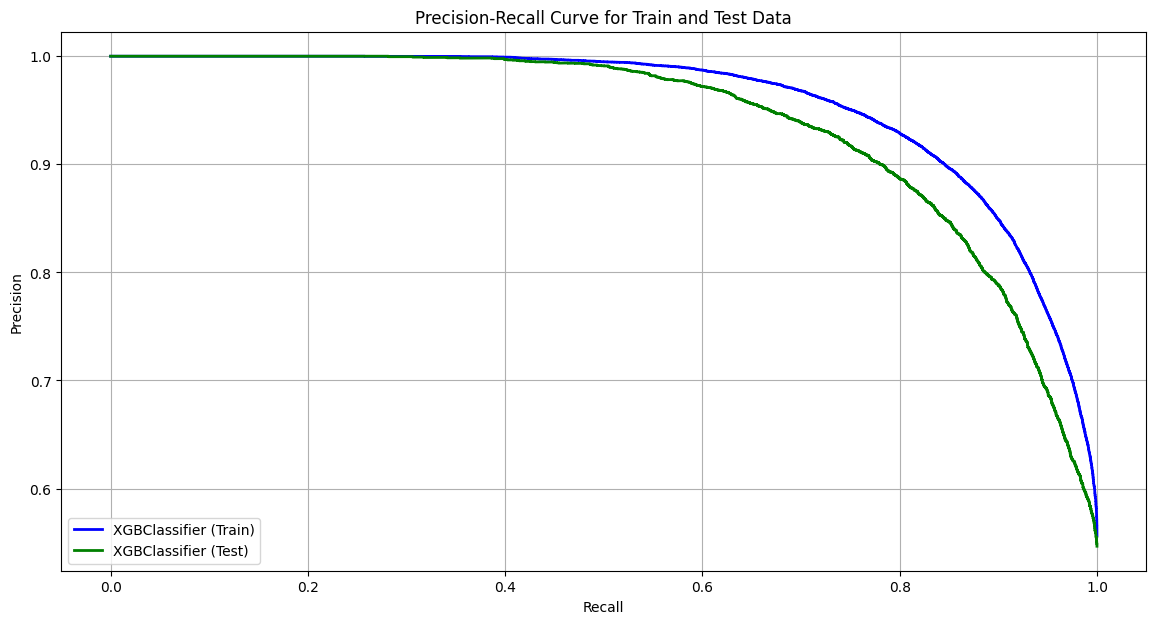

In [74]:
# Plot the Precision-Recall Curve
plt.figure(figsize=(14, 7))
plt.plot(recall_train, precision_train, color='b', lw=2, label=f'XGBClassifier (Train)')
plt.plot(recall_test, precision_test, color='g', lw=2, label=f'XGBClassifier (Test)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Train and Test Data')
plt.legend(loc="lower left")
plt.grid()

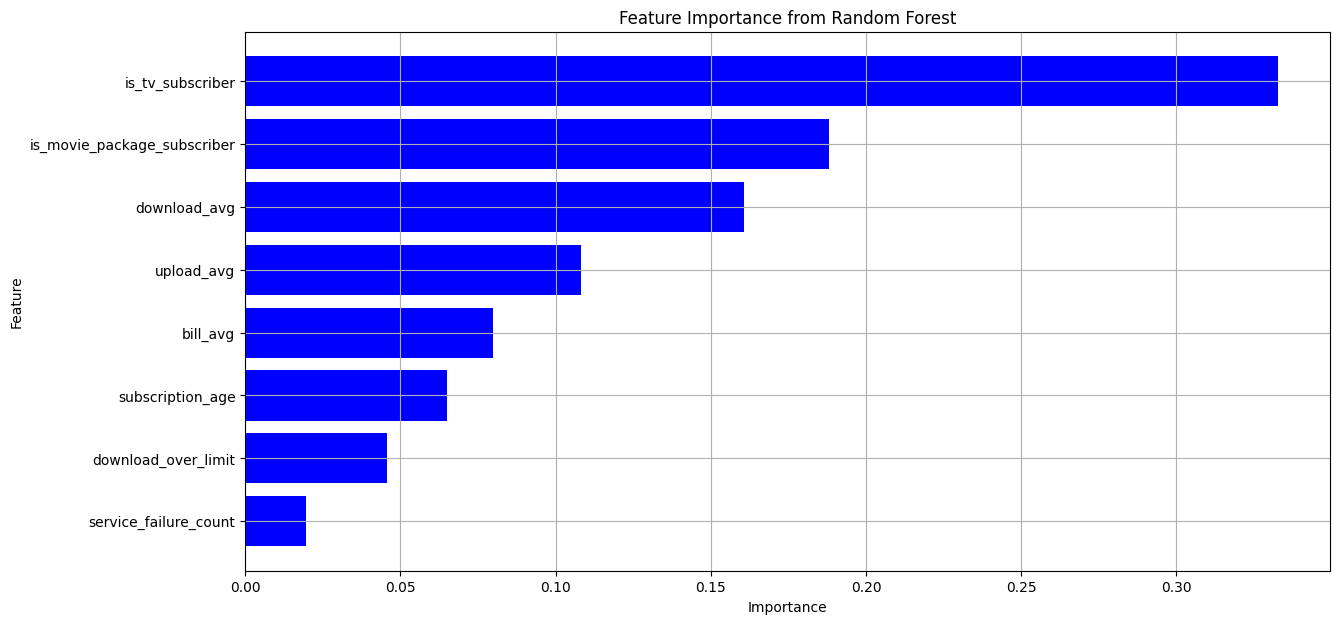

                       Feature  Importance
0             is_tv_subscriber    0.332867
1  is_movie_package_subscriber    0.188163
5                 download_avg    0.160832
6                   upload_avg    0.108141
3                     bill_avg    0.079859
2             subscription_age    0.064944
7          download_over_limit    0.045535
4        service_failure_count    0.019659


In [75]:
# Evaluation the model feature impotance
importances = model_xgb.feature_importances_

feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sorting features by their impotance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualization
plt.figure(figsize=(14, 7))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='b')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()
plt.grid()
plt.show()

print(importance_df)


Summary:

Customer Engagement (TV and Movie Package Subscriptions): The strongest predictors are related to how engaged customers are with value-added services like TV and movie packages.
Service Performance (Download and Upload Speeds): Customers who experience better performance in terms of internet speeds (both download and upload) are less likely to churn.
Billing and Financial Factors: While important, billing and financial factors are not as strong predictors. However, addressing issues around pricing and value can still help improve customer retention.

In [77]:
import pickle

# Saving the model to a pikle file
with open('model_xgb.pkl', 'wb') as file:
    pickle.dump(model_xgb, file)

In [67]:
# To load the model :
with open('model_xgb.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Recomendation for the company to help reduce customer churn

Enhance TV and Movie Package Offers: Given the strong impact of TV and movie subscriptions, improve offerings, introduce exclusive content, or bundle these services with other plans to increase customer engagement and reduce churn.

Optimize Service Performance: Focus on improving download and upload speeds. Offer proactive support to customers experiencing performance issues.

Review Pricing and Billing Strategies: While billing is not the most important factor, transparency and flexibility in pricing can still influence churn. Consider offering more flexible plans or discounts for long-term customers.